# Take a look at the fractions

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at
import seaborn as sns

In [68]:
from file_loc import FileLocs

fl = FileLocs()
file_base = fl.data_loc+'tmp/{type}_{prop}.npy'

In [69]:
label1 = ['Cluster', 'Infall', 'Interlopers']
label2 = ['Cluster+Infall', 'Cluster+Interlopers', 'Infall+Interlopers']


In [70]:
labels_mpr = ['sf', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

labels = labels_mpr+labels_bpt

In [71]:
columnsA = ['fo_%s'%li for li in labels]

In [72]:
cat0 = at.read('../data/groupCatalog_Yang_deCarvalho2017_frac.csv')

In [73]:
cat = cat0

In [74]:
cat

Yang,RA,DEC,z,logM200,R200,N200,fo_quenching,fo_quenching_err,fi_quenching,fi_quenching_err,fn_quenching,fn_quenching_err,qf1_quenching,qf1_quenching_err,qf2_quenching,qf2_quenching_err,qf3_quenching,qf3_quenching_err,fo_sf,fo_sf_err,fi_sf,fi_sf_err,fn_sf,fn_sf_err,qf1_sf,qf1_sf_err,qf2_sf,qf2_sf_err,qf3_sf,qf3_sf_err,fo_elliptical,fo_elliptical_err,fi_elliptical,fi_elliptical_err,fn_elliptical,fn_elliptical_err,qf1_elliptical,qf1_elliptical_err,qf2_elliptical,qf2_elliptical_err,qf3_elliptical,qf3_elliptical_err,fo_spiral,fo_spiral_err,fi_spiral,fi_spiral_err,fn_spiral,fn_spiral_err,qf1_spiral,qf1_spiral_err,qf2_spiral,qf2_spiral_err,qf3_spiral,qf3_spiral_err,fo_s0,fo_s0_err,fi_s0,fi_s0_err,fn_s0,fn_s0_err,qf1_s0,qf1_s0_err,qf2_s0,qf2_s0_err,qf3_s0,qf3_s0_err,fo_bulge,fo_bulge_err,fi_bulge,fi_bulge_err,fn_bulge,fn_bulge_err,qf1_bulge,qf1_bulge_err,qf2_bulge,qf2_bulge_err,qf3_bulge,qf3_bulge_err,fo_disk,fo_disk_err,fi_disk,fi_disk_err,fn_disk,fn_disk_err,qf1_disk,qf1_disk_err,qf2_disk,qf2_disk_err,qf3_disk,qf3_disk_err,fo_bar,fo_bar_err,fi_bar,fi_bar_err,fn_bar,fn_bar_err,qf1_bar,qf1_bar_err,qf2_bar,qf2_bar_err,qf3_bar,qf3_bar_err,fo_merger,fo_merger_err,fi_merger,fi_merger_err,fn_merger,fn_merger_err,qf1_merger,qf1_merger_err,qf2_merger,qf2_merger_err,qf3_merger,qf3_merger_err,fo_lsf,fo_lsf_err,fi_lsf,fi_lsf_err,fn_lsf,fn_lsf_err,qf1_lsf,qf1_lsf_err,qf2_lsf,qf2_lsf_err,qf3_lsf,qf3_lsf_err,fo_liners,fo_liners_err,fi_liners,fi_liners_err,fn_liners,fn_liners_err,qf1_liners,qf1_liners_err,qf2_liners,qf2_liners_err,qf3_liners,qf3_liners_err,fo_agn,fo_agn_err,fi_agn,fi_agn_err,fn_agn,fn_agn_err,qf1_agn,qf1_agn_err,qf2_agn,qf2_agn_err,qf3_agn,qf3_agn_err,fo_compos,fo_compos_err,fi_compos,fi_compos_err,fn_compos,fn_compos_err,qf1_compos,qf1_compos_err,qf2_compos,qf2_compos_err,qf3_compos,qf3_compos_err,fo_unclas,fo_unclas_err,fi_unclas,fi_unclas_err,fn_unclas,fn_unclas_err,qf1_unclas,qf1_unclas_err,qf2_unclas,qf2_unclas_err,qf3_unclas,qf3_unclas_err,fo_spiral_quenching,fo_spiral_quenching_err,fi_spiral_quenching,fi_spiral_quenching_err,fn_spiral_quenching,fn_spiral_quenching_err,qf1_spiral_quenching,qf1_spiral_quenching_err,qf2_spiral_quenching,qf2_spiral_quenching_err,qf3_spiral_quenching,qf3_spiral_quenching_err
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,240.5602,16.1113,0.036,15.29,2.01,525,0.6820440693858416,0.07333806963036255,0.5046639615689568,0.0420807419795779,0.44992483646853293,0.05148259752285285,0.35810055004018915,0.17338860095981778,0.4219773011148326,0.167613887890644,0.09951208258340585,0.121237

In [9]:
df = cat0.to_pandas()

In [10]:
def get_columns(mytpe):
    columnsA = ['f%s_%s'%(li,mytpe) for li in ('o','i','n')]
    columnsA += ['qf1_%s'%(mytpe),'qf2_%s'%(mytpe),'qf3_%s'%(mytpe)]
    return columnsA

In [11]:
mytpe = 'elliptical'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_elliptical,fi_elliptical,fn_elliptical,qf1_elliptical,qf2_elliptical,qf3_elliptical
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.662220,0.528752,0.441018,0.281264,0.344866,0.094763
std,0.146742,0.139395,0.168124,0.235697,0.389835,0.426849
min,0.019231,0.118734,0.000000,-0.603743,-3.641752,-4.727536
16%,0.517651,0.397115,0.271035,0.069371,0.097861,-0.099573
50%,0.686930,0.537429,0.450000,0.296513,0.400698,0.143443
84%,0.807771,0.671338,0.610950,0.505175,0.646519,0.365406
max,0.976073,0.872668,0.939271,0.873631,0.945672,0.697481


In [12]:
mytpe = 'quenching'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_quenching,fi_quenching,fn_quenching,qf1_quenching,qf2_quenching,qf3_quenching
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.733907,0.590864,0.468691,0.361608,0.464844,0.183028
std,0.143508,0.144218,0.174505,0.256710,0.322092,0.312041
min,0.309059,0.181562,0.000000,-0.534216,-1.587092,-1.721210
16%,0.583977,0.441385,0.279896,0.136407,0.200604,-0.079567
50%,0.759504,0.597406,0.472702,0.371297,0.514345,0.205555
84%,0.867989,0.748923,0.655834,0.596349,0.752841,0.451786
max,1.000000,0.949878,0.921649,1.000000,1.000000,0.866971


In [13]:
mytpe = 'spiral'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_spiral,fi_spiral,fn_spiral,qf1_spiral,qf2_spiral,qf3_spiral
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.337780,0.471248,0.558982,-0.296646,-inf,-inf
std,0.146742,0.139395,0.168124,0.308394,NaN,NaN
min,0.023927,0.127332,0.060729,-2.032724,-inf,-inf
16%,0.192229,0.328662,0.389050,-0.547210,-1.383514,-0.749342
50%,0.313070,0.462571,0.550000,-0.238820,-0.466206,-0.174876
84%,0.482349,0.602885,0.728965,-0.049111,-0.097892,0.082051
max,0.980769,0.881266,1.000000,0.888434,0.860080,0.624763


In [14]:
mytpe = 'spiral'
columnsA = ['f%s_%s'%(li,mytpe) for li in ('o','i','n')]
df[columnsA].describe(percentiles=[.16,.50,.84])

,fo_spiral,fi_spiral,fn_spiral
count,319.000000,319.000000,319.000000
mean,0.337780,0.471248,0.558982
std,0.146742,0.139395,0.168124
min,0.023927,0.127332,0.060729
16%,0.192229,0.328662,0.389050
50%,0.313070,0.462571,0.550000
84%,0.482349,0.602885,0.728965
max,0.980769,0.881266,1.000000


In [15]:
columns=['fo_quenching','fo_elliptical','fi_quenching','fi_elliptical','fn_quenching', 'fn_elliptical']
df[columns].describe(percentiles=[.16,.50,.84])

,fo_quenching,fo_elliptical,fi_quenching,fi_elliptical,fn_quenching,fn_elliptical
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.733907,0.662220,0.590864,0.528752,0.468691,0.441018
std,0.143508,0.146742,0.144218,0.139395,0.174505,0.168124
min,0.309059,0.019231,0.181562,0.118734,0.000000,0.000000
16%,0.583977,0.517651,0.441385,0.397115,0.279896,0.271035
50%,0.759504,0.686930,0.597406,0.537429,0.472702,0.450000
84%,0.867989,0.807771,0.748923,0.671338,0.655834,0.610950
max,1.000000,0.976073,0.949878,0.872668,0.921649,0.939271


In [16]:
import pandas as pd

def plot_enviroment(cat,mytpe):
    orbital = np.array(cat['fo_%s'%(mytpe)])
    infall = np.array(cat['fi_%s'%(mytpe)])
    interloper = np.array(cat['fn_%s'%(mytpe)])
    
    x1label = np.full((orbital.size),'cluster')
    x2label = np.full((orbital.size),'infall')
    x3label = np.full((orbital.size),'interloper')
    
    y = np.hstack([orbital,infall,interloper])
    x = np.hstack([x1label,x2label,x3label])
    
    res = pd.DataFrame({'fraction':y,mytpe:x})
    
    plt.clf()
#     g = sns.catplot(x="category", y="fraction", kind="violin", inner=None, data=res)
    g = sns.catplot(x=mytpe, y="fraction", kind="box", data=res,ci=86.5,estimator=np.median)
    #sns.swarmplot(x="category", y="fraction", color="k", size=3, data=res, ax=g.ax)
    plt.title(mytpe,fontsize=18)
    
    return res

<Figure size 432x288 with 0 Axes>

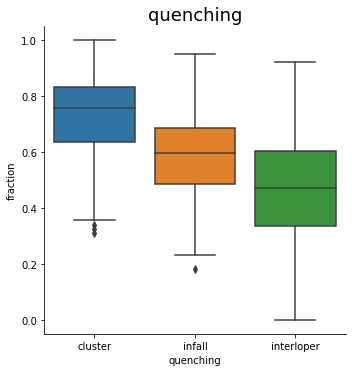

In [17]:
df = plot_enviroment(cat,'quenching')

<Figure size 432x288 with 0 Axes>

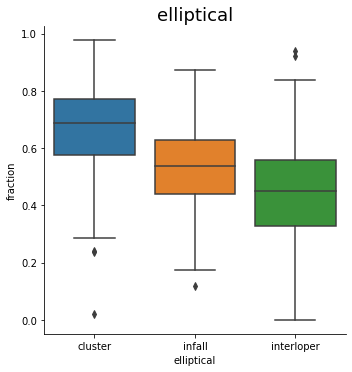

In [18]:
df = plot_enviroment(cat,'elliptical')

<Figure size 432x288 with 0 Axes>

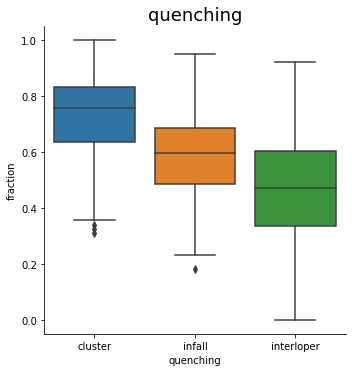

In [19]:
df = plot_enviroment(cat,'quenching')

<Figure size 432x288 with 0 Axes>

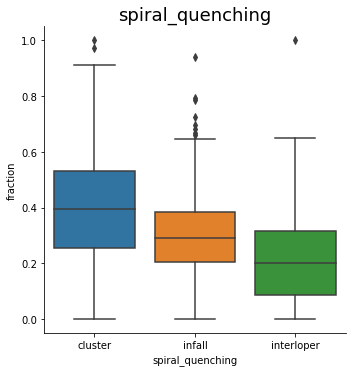

In [20]:
df = plot_enviroment(cat,'spiral_quenching')

<Figure size 432x288 with 0 Axes>

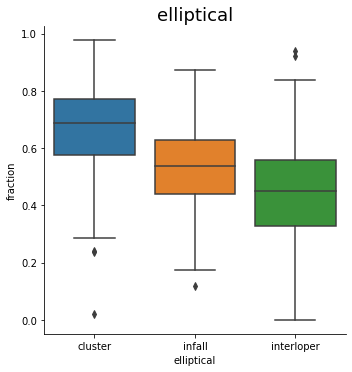

In [21]:
df = plot_enviroment(cat,'elliptical')

In [22]:
mytype='quenching'

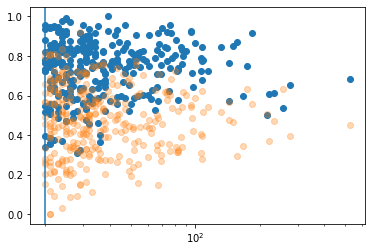

In [23]:
plt.scatter(cat['N200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
plt.axvline(20)
plt.xscale('log')

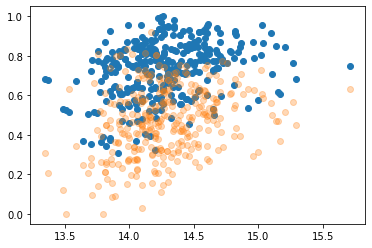

In [24]:
plt.scatter(cat['logM200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['logM200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

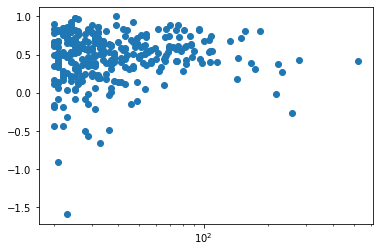

In [25]:
plt.scatter(cat['N200'],cat['qf2_%s'%(mytype)])
plt.xscale('log')

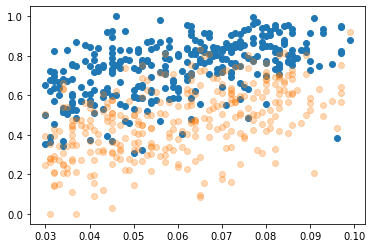

In [26]:
plt.scatter(cat['z'],cat['fo_%s'%(mytype)])
plt.scatter(cat['z'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

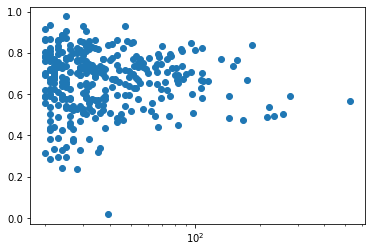

In [27]:
plt.scatter(cat['N200'],cat['fo_elliptical'])
plt.xscale('log')

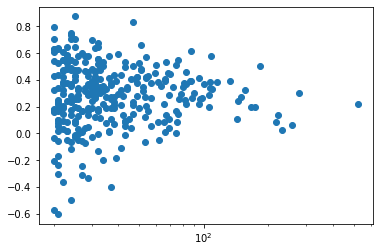

In [28]:
plt.scatter(cat['N200'],cat['qf1_elliptical'])
plt.xscale('log')

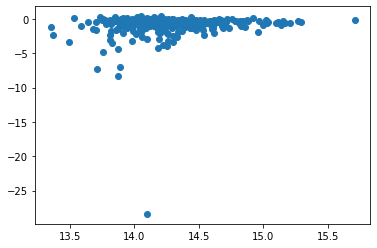

In [29]:
plt.scatter(cat['logM200'],cat['qf2_sf'])

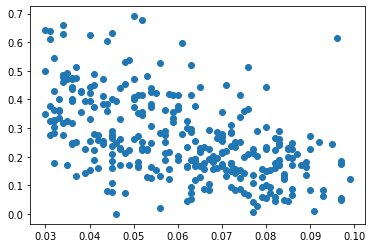

In [30]:
plt.scatter(cat['z'],cat['fo_sf'])

In [31]:
labels_mpr = ['quenching', 'sf', 'elliptical', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

In [32]:
mytype1='quenching'
mytype2='unclas'

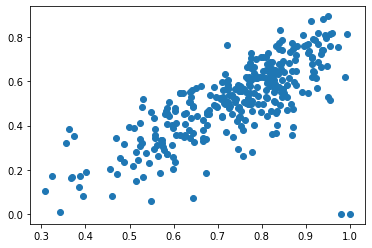

In [33]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [34]:
mytype1='elliptical'
mytype2='quenching'
mytype3='unclas'

(-0.02, 1.02)

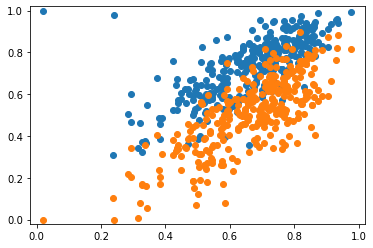

In [35]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype3)])
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [75]:
from astropy.table import join
cat0 = at.read('../data/groupCatalog_Yang_deCarvalho2017_smass.csv')
catn = join(cat0,cat,keys=['Yang','z','N200','logM200'])

In [80]:
cat = catn

In [81]:
halo_mass = cat['logM200']
n200 = cat['N200']

In [82]:
smasso = cat['smasso']
smassi = cat['smassi']
sfro = cat['sfro']
sfri = cat['sfri']

ssfro = sfro-smasso
ssfri = sfri-smassi

In [83]:
fstellar = smasso-halo_mass

In [84]:
OIstelar = smasso-smassi

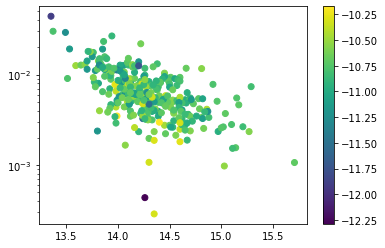

In [85]:
plt.scatter(halo_mass,10**fstellar,c=ssfro)
plt.yscale('log')
plt.colorbar()

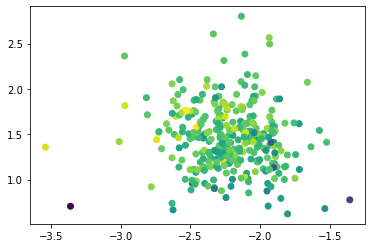

In [86]:
# plt.plot([11.,13.5],[11.,13.5],'k--')
plt.scatter(fstellar,sfri,c=ssfro)

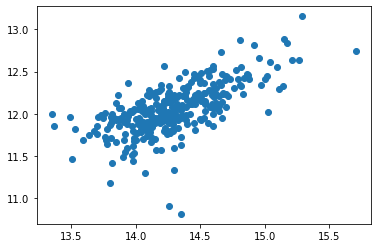

In [87]:
plt.scatter(halo_mass,smasso)

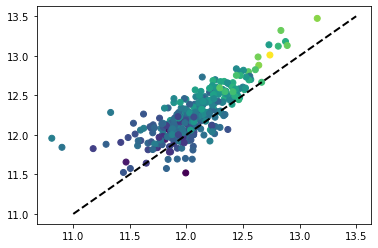

In [88]:
plt.plot([11.,13.5],[11.,13.5],'k--',lw=2)
plt.scatter(smasso,smassi,c=halo_mass)

In [91]:
df = cat.to_pandas()

In [93]:
columns = ['z','N200','logM200','smasso','smassi','fo_elliptical','fi_elliptical']

In [103]:
# pd.plotting.scatter_matrix(df[columns])


In [104]:
# pd.plotting.scatter_matrix(df[['z','fo_elliptical','fi_elliptical']])
# plt.scatter(df['z','fi_elliptical'])

In [106]:
list(df.columns)

['Yang',
 'z',
 'N200',
 'logM200',
 'smasso',
 'smasso_err',
 'smassi',
 'smassi_err',
 'sfro',
 'sfro_err',
 'sfri',
 'sfri_err',
 'smasso_quenching',
 'smasso_quenching_err',
 'smassi_quenching',
 'smassi_quenching_err',
 'sfro_quenching',
 'sfro_quenching_err',
 'sfri_quenching',
 'sfri_quenching_err',
 'smasso_sf',
 'smasso_sf_err',
 'smassi_sf',
 'smassi_sf_err',
 'sfro_sf',
 'sfro_sf_err',
 'sfri_sf',
 'sfri_sf_err',
 'smasso_elliptical',
 'smasso_elliptical_err',
 'smassi_elliptical',
 'smassi_elliptical_err',
 'sfro_elliptical',
 'sfro_elliptical_err',
 'sfri_elliptical',
 'sfri_elliptical_err',
 'smasso_spiral',
 'smasso_spiral_err',
 'smassi_spiral',
 'smassi_spiral_err',
 'sfro_spiral',
 'sfro_spiral_err',
 'sfri_spiral',
 'sfri_spiral_err',
 'RA',
 'DEC',
 'R200',
 'fo_quenching',
 'fo_quenching_err',
 'fi_quenching',
 'fi_quenching_err',
 'fn_quenching',
 'fn_quenching_err',
 'qf1_quenching',
 'qf1_quenching_err',
 'qf2_quenching',
 'qf2_quenching_err',
 'qf3_quenching',


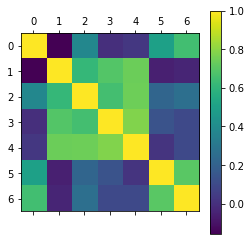

In [108]:
import matplotlib.pyplot as plt

plt.matshow(df[columns].corr())
plt.colorbar()

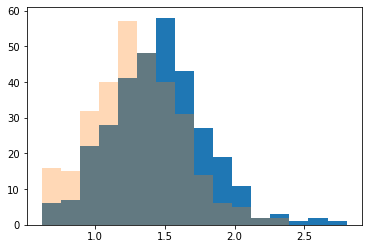

In [45]:
a = plt.hist(sfri,bins=16)
a = plt.hist(sfro,bins=a[1],alpha=0.3)

In [46]:
a[1]

array([0.62052656, 0.75684003, 0.89315349, 1.02946696, 1.16578043,
       1.30209389, 1.43840736, 1.57472083, 1.71103429, 1.84734776,
       1.98366123, 2.11997469, 2.25628816, 2.39260163, 2.52891509,
       2.66522856, 2.80154203])

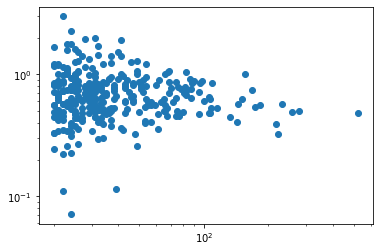

In [47]:
plt.scatter(n200,10**OIstelar)
plt.yscale('log')
plt.xscale('log')

In [48]:

from utils import gaussian_kde

In [49]:
stellar_mass_label = r'Log($M_{\star}/M_{\odot}$) ' 
sfr_label = r'SFR [$ M_{\star} / yr$]'
ssfr_label= r'sSFR [yr$^{-1}$]'

In [50]:
def get_kde(xy,weights=None):
    pdf = gaussian_kde(xy, weights=weights)
    pdf.set_bandwidth(bw_method=pdf.factor / 1.2)  # kde bandwidth
    zz2 = pdf((np.ravel(xx), np.ravel(yy)))
    zz2 = np.reshape(zz2, xx.shape)
    return zz2

In [51]:
# grid
xmin, xmax = 11., 13.0
# ymin, ymax = -10.0, -11.75
ymin, ymax = 0.4, 2.5
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

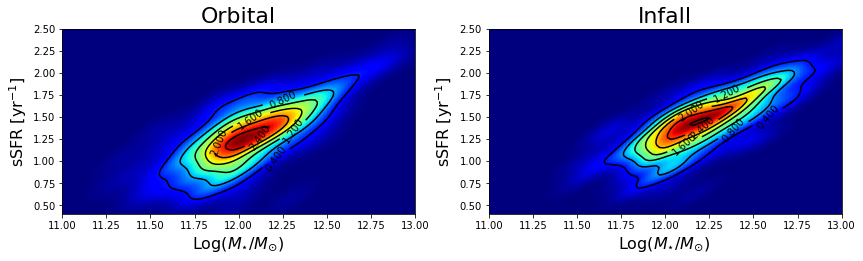

In [180]:
fig, axis = plt.subplots(1, 2, figsize=(12,6))
sSFRmass(smasso,sfro,np.ones_like(smasso),ax=axis[0],title='Orbital')
sSFRmass(smassi,sfri,np.ones_like(smasso),ax=axis[1],title='Infall')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
# fig.savefig('../plots/ssfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

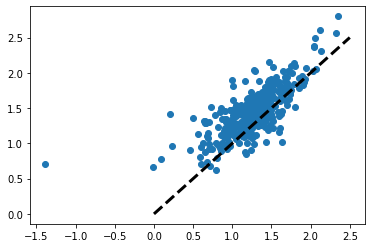

In [183]:
plt.scatter(sfro,sfri)
plt.plot([0.,2.5],[0.,2.5],'k--',lw=3)

In [224]:
# fq = np.array(cat0['fo_spiral'])
fq = np.array(cat['smasso_sf'])

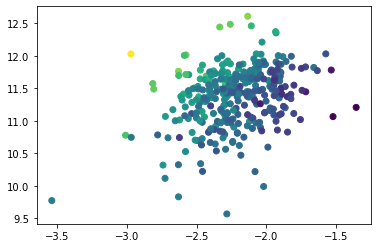

In [225]:
plt.scatter(fstellar,fq,c=halo_mass)
# plt.ylim(11)